we are building a machine learning model to predict the selling price of the car.
Selling price is the target variable or dependent variable and all other are the independent variable

# Part 1: Data Preprocessing

dataset link: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

## Importing the libraries and the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/car data.csv')

In [4]:
# To check if the dataset has added sucessfully
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
dataset.shape

(301, 9)

There are total 301 entries in this daatset and total 9 columns

In [7]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [15]:
# It provide the info about the dataset as in the datatype of the columns
# null or non null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
# Categorical columns in this dataset
dataset.select_dtypes(include='object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [10]:
len(dataset.select_dtypes(include='object').columns)

4

In [11]:
# numerical columns
dataset.select_dtypes(include=['float64','int64']).columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [12]:
len(dataset.select_dtypes(include=['float64','int64']).columns)

5

In [16]:
# It provides the statistical summary of the dataset
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Dealing with missing values

In [17]:
dataset.isnull().values.any()

False

In [18]:
dataset.isnull().values.sum()

0

This shows this dataset has no null values

## Restructure the dataset

In [19]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


By observing the dataset we can conclude that the car name is not related with the selling price so, we can drop this column

In [20]:
dataset = dataset.drop(columns='Car_Name')

In [21]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [22]:
# Adding a column
dataset['Current_Year'] = 2024

In [23]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024


In [24]:
# add a column
dataset['Years_Old'] = dataset['Current_Year'] - dataset['Year']

In [25]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Years_Old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


Now we do not need current year or year in our dataset so we drop these columns

In [26]:
dataset = dataset.drop(columns=['Current_Year','Year'])

In [27]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


## Encoding the categorical data

In [28]:
dataset.select_dtypes(include='object').columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [29]:
len(dataset.select_dtypes(include='object').columns)

3

In [30]:
# Check the unique value in these columns
dataset['Fuel_Type'].nunique()

3

In [31]:
dataset['Seller_Type'].nunique()

2

In [32]:
dataset['Transmission'].nunique()

2

In [33]:
dataset.shape

(301, 8)

In [50]:
# Apply one-hot encoding
dataset = pd.get_dummies(data=dataset, drop_first=True)

# Convert only the Boolean columns
bool_columns = dataset.select_dtypes(include=['bool']).columns
dataset[bool_columns] = dataset[bool_columns].astype(int)


In [51]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3,5,27000,0,10,0,1,0,1
1,4,9,43000,0,11,1,0,0,1
2,7,9,6900,0,7,0,1,0,1
3,2,4,5200,0,13,0,1,0,1
4,4,6,42450,0,10,1,0,0,1


In [52]:
dataset.shape

(301, 9)

##  Correlation matrix

To check the correlation of independent variables with the dependent variable first we create dataset_2 then we drop the dependent variable from that so, that we have a dataset only consisting of the independent variable then correlate this dataset with the dependent variable that is Selling_Price to see the relation plot

In [53]:
dataset_2 = dataset.drop(columns='Selling_Price')

<Axes: title={'center': 'Correlating with selling price'}>

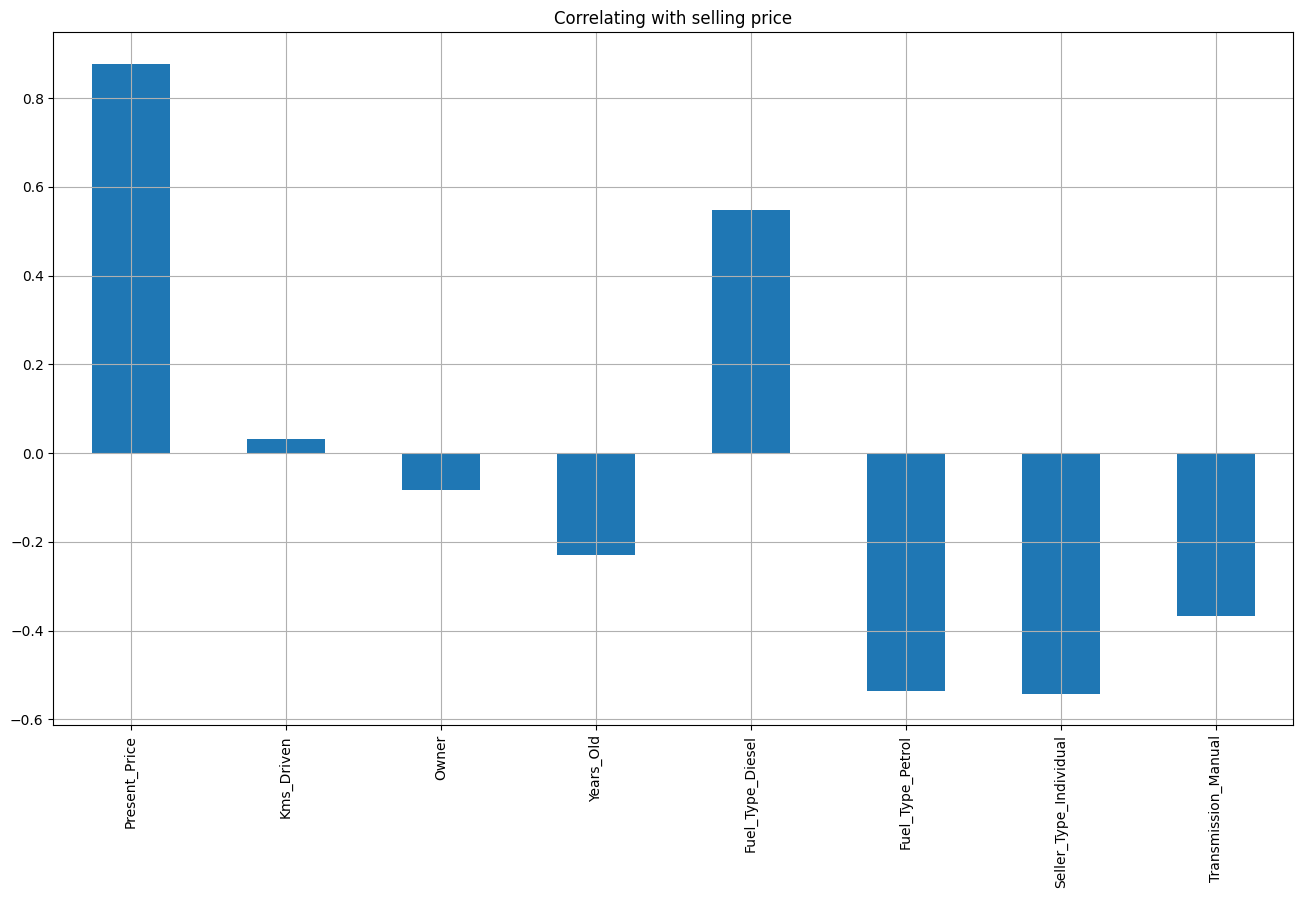

In [54]:
dataset_2.corrwith(dataset['Selling_Price']).plot.bar(
    figsize=(16,9),title='Correlating with selling price', grid=True
)

In [55]:
corr = dataset.corr()

<Axes: >

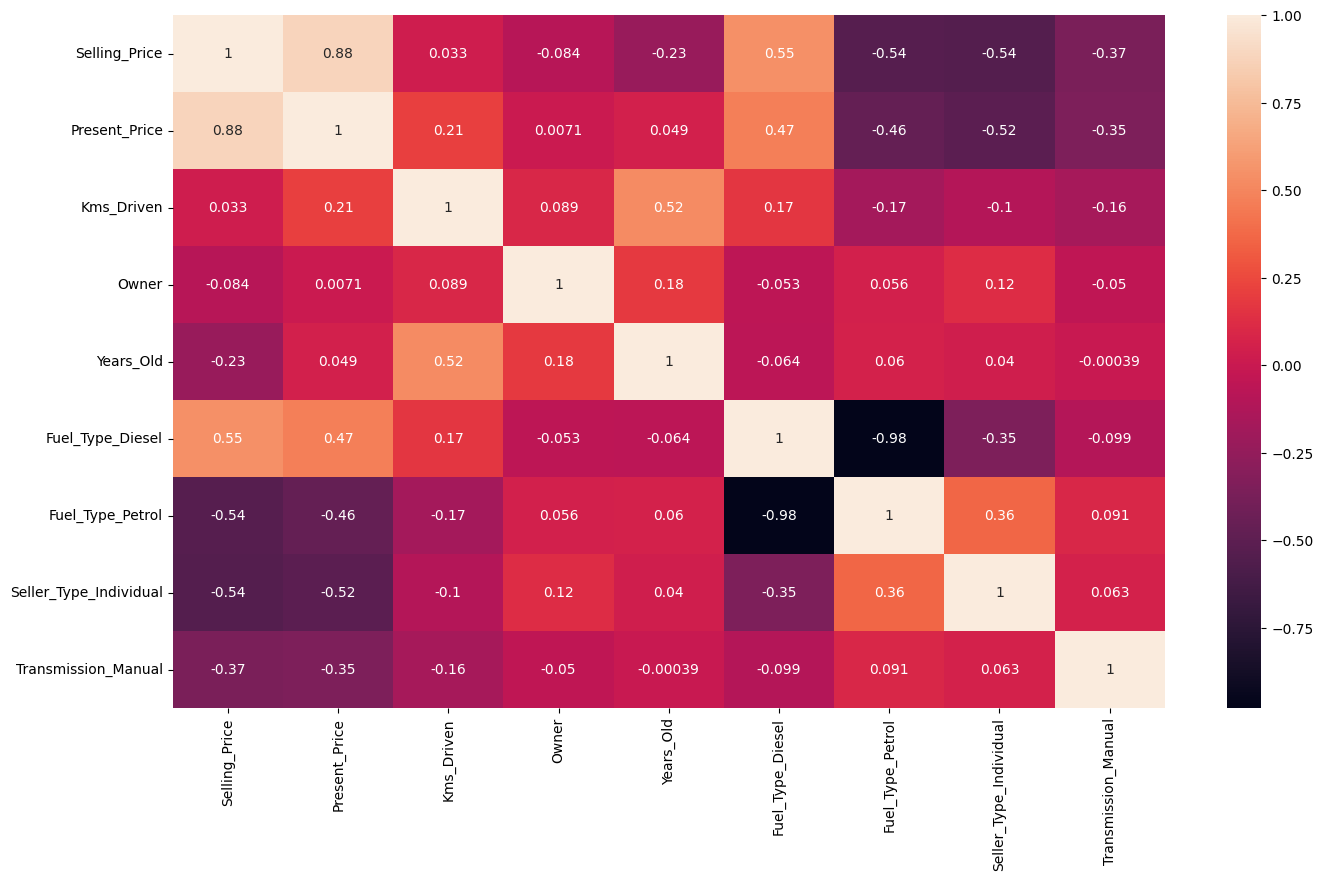

In [56]:
# heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

The more light the color the more is correlation and the black boxes are negatively correlated

## Splitting the dataset

Before Spliting the dataset we have to identify x and y that is features of matrix and then we have to split the dataset into test and train set

In [57]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3,5,27000,0,10,0,1,0,1
1,4,9,43000,0,11,1,0,0,1
2,7,9,6900,0,7,0,1,0,1
3,2,4,5200,0,13,0,1,0,1
4,4,6,42450,0,10,1,0,0,1


In [58]:
# matrix of features
x = dataset.drop(columns='Selling_Price')

In [59]:
# target variable
y = dataset['Selling_Price']

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

80 percent is the tarining data and 20 percent is the test data

In [61]:
x_train.shape

(240, 8)

In [62]:
y_train.shape

(240,)

In [63]:
x_test.shape

(61, 8)

In [65]:
y_test.shape

(61,)

## Feature Scaling

In [66]:
# Not doing feature scaling in this

# Part 2: Building the model

## Multiple Linear regression Model

In [67]:
# first import the class LinearRegression
# then create an instance of this class
# then train the model using .fit method

from sklearn.linear_model import LinearRegression
regressor_mlr = LinearRegression()
regressor_mlr.fit(x_train, y_train)

LinearRegression()

In [68]:
# predict a y value
y_pred = regressor_mlr.predict(x_test)

Now we have to evalute the model performes, using r_2 score,
the best possible score is 1 and it can be negative also

In [69]:
from sklearn.metrics import r2_score

In [70]:
r2_score(y_test,y_pred)

0.9076641809609923

## Random Forest Regression

In [71]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train,y_train)

RandomForestRegressor()

In [72]:
y_pred = regressor_rf.predict(x_test)

In [74]:
# r2_score is also called coefficient of determination
# is a statistical measure that indicates how well the independent variables in a regression model
# explain the variability of the dependent variable

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9479376337142981

Random Forest r2_score is more close to 1 than to multiple linear regression therefore we finalize random forest regression as our model

# Part 3: Finding the optimal parameters using RandomizedSearchCv

In [75]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

In [85]:
parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],  # Corrected here
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_cv = RandomizedSearchCV(estimator=regressor_rf, param_distributions=parameters, n_iter=10, scoring='neg_mean_absolute_error', cv=5, verbose=2, n_jobs=-1)
random_cv.fit(x_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [86]:
random_cv.best_estimator_

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=500)

In [87]:
random_cv.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

# Part 4: Final model

In [88]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_depth=10, max_features='log2',
                                  n_estimators=500
    )
regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=500)

In [89]:
y_pred = regressor.predict(x_test)

In [90]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9500576323433906

# Part 5: Predicting a single observation

In [91]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3,5,27000,0,10,0,1,0,1
1,4,9,43000,0,11,1,0,0,1
2,7,9,6900,0,7,0,1,0,1
3,2,4,5200,0,13,0,1,0,1
4,4,6,42450,0,10,1,0,0,1


In [100]:
# To get the predicted price we have to provide value to above each columns
observation = [[8,3500,0,5,1,0,0,1]]

In [101]:
regressor.predict(observation)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([9.71933333])